In [1]:
import sys
sys.path.append("/mnt/d/00_SARDARCHITECTLABS/projects/fscoreai-ml/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fscoreai.utils import utils
from fscoreai.loss import loss
from fscoreai.sample_data import sample_data
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression

# One-Dimensional Data

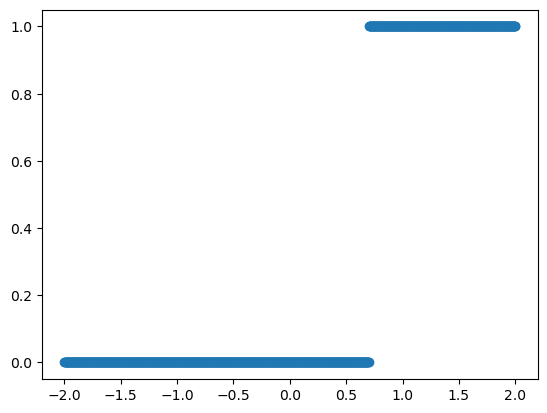

In [3]:
X, y = sample_data.simulate_regression_data(-2, 2, 1000)
plt.scatter(X, y)

## Logistic Regression with SkLearn

In [4]:
model_sklearn = LogisticRegression()
model_sklearn.fit(X,y)
print(model_sklearn.coef_, model_sklearn.intercept_)

[[7.43296748]] [-5.20834779]


(-0.1, 1.1)

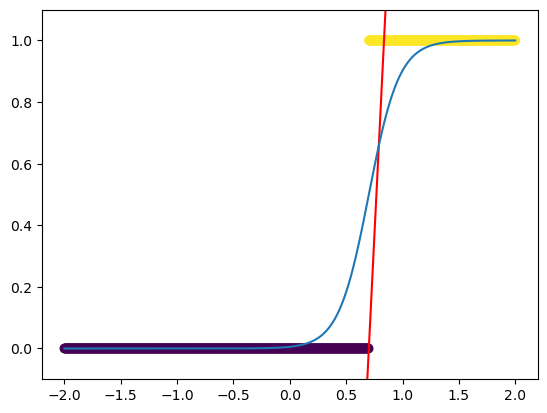

In [5]:
y_test = (X * model_sklearn.coef_ + model_sklearn.intercept_).reshape(-1, 1)
sigmoid = utils.sigmoid(y_test).reshape(-1,1)
plt.scatter(X, y, c=y)
plt.plot(X, y_test, c='red')
plt.plot(X, sigmoid)
plt.ylim(-0.1,1.1)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = model_sklearn.predict(X)
print(accuracy_score(y, y_pred))
print("\n", confusion_matrix(y, y_pred))

1.0

 [[675   0]
 [  0 325]]


## Custom Logistic Regression

In [7]:
class SimpleLogisticRegression():
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0
    
    def fit(self, X, y, lr=1e-8, epochs=50):
        # Batch Gradient Descent Solution
            self.lr = lr  #   Learning rate
            self.epochs = epochs
            self.n, self.d = X.shape
            
            for epoch in range(self.epochs):
                for j in range(self.d):
                    y_pred = self.predict(X)
                    d_coef = - (2 / self.n) * np.sum((y - y_pred).dot(X[:,j])) #Derivative w.r.t. self.coef_
                    d_intercept = - (2 / self.n) * np.sum(y - y_pred) #Derivative w.r.t. self.intercept_
                    self.coef_ -=  self.lr * d_coef          #    Update self.coef_ 
                    self.intercept_ -=  self.lr * d_intercept  #    Update self.intercept_
            return self
        
    def predict(self, X):
        return utils.sigmoid(np.dot(X, self.coef_) + self.intercept_)

8.783783783784363 -2.2569373036102376


(-0.1, 1.1)

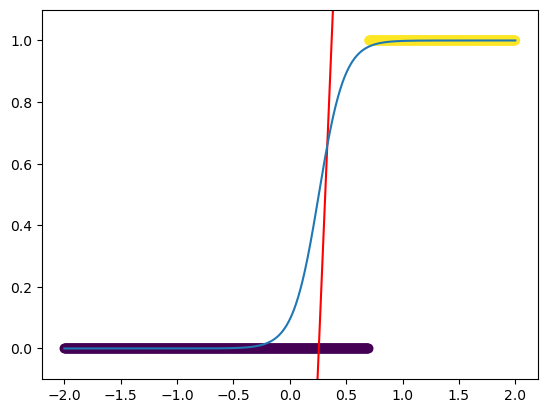

In [8]:
model_fscore1 = SimpleLogisticRegression()
model_fscore1.fit(X,y, lr=1e-6, epochs=10000)
print(model_fscore1.coef_, model_fscore1.intercept_)

y_test = (X * model_fscore1.coef_ + model_fscore1.intercept_).reshape(-1, 1)
sigmoid = utils.sigmoid(y_test).reshape(-1,1)
plt.scatter(X, y, c=y)
plt.plot(X, y_test, c='red')
plt.plot(X, sigmoid)
plt.ylim(-0.1,1.1)

In [9]:
y_pred = np.round(model_fscore1.predict(X))
print(accuracy_score(y, y_pred))
print("\n", confusion_matrix(y, y_pred))

0.889

 [[564 111]
 [  0 325]]


In [10]:
class MultipleLogisticRegression():
    def __init__(self):
        self.betas = None
        self.coef_ = None
        self.intercept_ = None
        
        self.betas_history = {}
        self.loss_history = {}
        self.gradients_history = {}
    
    def fit(self, X, y, lr, iters):
        # Batch Gradient Descent Solution
        y = y.reshape(-1, 1)
        self.n, self.d = X.shape
        x_0 = np.ones((self.n, 1))
        x = np.hstack((x_0, X))

        # Initialize betas
        self.betas = np.random.randn(self.d + 1, 1)

        for i in range(iters):
            y_pred = utils.sigmoid(np.dot(x, self.betas))
            delta_betas = 2 * np.dot(x.T, (y_pred - y))
            self.betas -= (lr * delta_betas)

            # Logging Loss
            self.gradients_history[i] = delta_betas
            b = self.betas.copy()
            self.betas_history[i] = b
            self.loss_history[i] = loss.mean_squared_error(y_pred, y)

        self.intercept_ = self.betas[0]
        self.coef_ = self.betas[1:]
        return self
        
    def predict(self, X):
        x_0 = np.ones((X.shape[0], 1))
        x = np.hstack((x_0, X))
        return utils.sigmoid(np.dot(x, self.betas))

In [20]:
model_fscore2 = MultipleLogisticRegression()
model_fscore2.fit(X, y, lr=1e-5, iters=100000)
print(model_fscore2.coef_, model_fscore2.intercept_)

[[11.79685548]] [-8.20008941]


0.999

 [[674   1]
 [  0 325]]


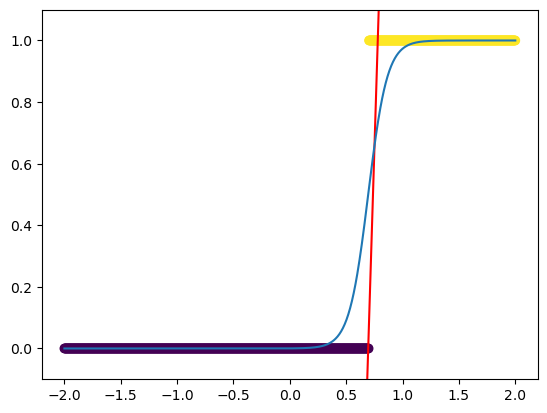

In [21]:
y_test = (X * model_fscore2.coef_ + model_fscore2.intercept_).reshape(-1, 1)
sigmoid = utils.sigmoid(y_test).reshape(-1,1)
plt.scatter(X, y, c=y)
plt.plot(X, y_test, c='red')
plt.plot(X, sigmoid)
plt.ylim(-0.1,1.1)

y_pred = np.round(model_fscore2.predict(X))
print(accuracy_score(y, y_pred))
print("\n", confusion_matrix(y, y_pred))

# Logistic Regression Batch Gradient Descent Analysis

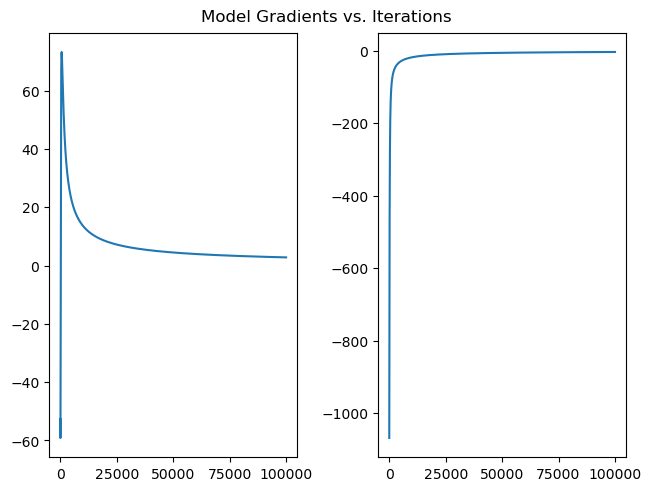

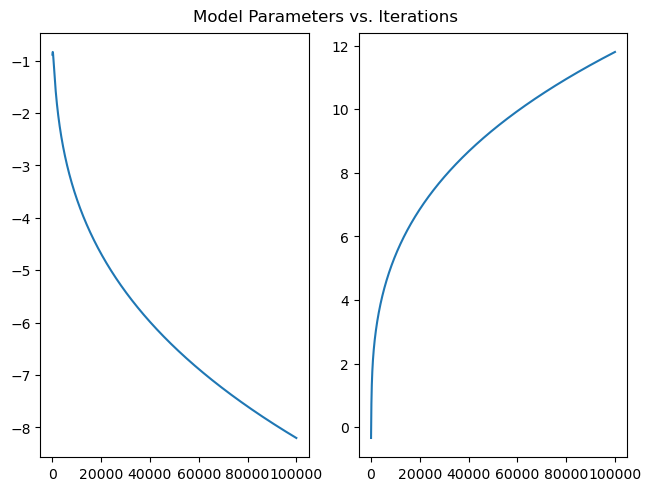

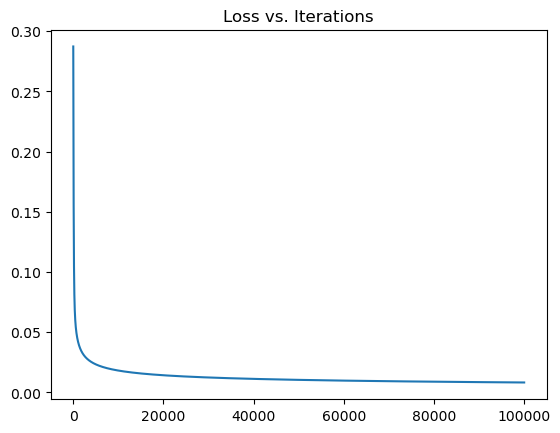

In [22]:
# Logging and visualizing stored training data
model_betas = np.array(list(model_fscore2.betas_history.values()))
model_gradients = np.array(list(model_fscore2.gradients_history.values()))
model_loss = np.array(list(model_fscore2.loss_history.values()))

# Visualize Model Gradients
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('Model Gradients vs. Iterations')
for i in range(1):
    for j in range(2):
        n = j + i
        axs[j].plot(model_fscore2.gradients_history.keys(), model_gradients[:, n])
plt.show()

# Visualize Model Parameters
fig, axs = plt.subplots(1, 2, constrained_layout = True)
fig.suptitle('Model Parameters vs. Iterations')
for i in range(1):
    for j in range(2):
        n = j + i
        axs[j].plot(model_fscore2.betas_history.keys(), model_betas[:, n])
plt.show()

# Visualize Model Loss
plt.plot(model_fscore2.loss_history.keys(), model_loss)
plt.title("Loss vs. Iterations")
plt.show()